<a href="https://colab.research.google.com/github/mc-ivan/computer-vision/blob/main/lab2/notebooks/Practica2_Grupo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 2: Detección de Residuos Plásticos en Imágenes mediante YOLOv8

**Grupo 3**
- Ivan Mamani
- Yesica Luna
- Elvis Miranda
- Karem Huacota
- Karen Torrico

**Dataset:** https://universe.roboflow.com/rahulrahul101099-gmail-com/plastic-waste-o7ob0

---



In [48]:
# Verificar que Colab tenga GPU disponible
!nvidia-smi


Sun Feb  8 02:01:26 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   64C    P0             29W /   70W |     990MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Instalar Ultralytics (YOLOv8 estable) y Roboflow
!pip install -U ultralytics roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 86.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.13.0.90
    Uninstalling opencv-python-headless-4.13.0.90:
      Successfully uninstalled opencv-python-headless-4.13.0.90
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [3]:
# Importar librerías necesarias
from ultralytics import YOLO
import os


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
# Descarga del dataset de residuos plásticos desde RoboFlow Universe
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="DQv0akyzHYegEmXrUS5l")
project = rf.workspace("rahulrahul101099-gmail-com").project("plastic-waste-o7ob0")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Plastic-Waste-1 in yolov8:: 100%|██████████| 162/162 [00:00<00:00, 9010.92it/s]


In [5]:
# Verificar que el dataset esté bien estructurado
print(dataset.location)
os.listdir(dataset.location)


/content/Plastic-Waste-1


['train',
 'test',
 'data.yaml',
 'valid',
 'README.roboflow.txt',
 'README.dataset.txt']

In [6]:
# Verificar que el dataset esté bien estructurado
print(dataset.location)
os.listdir(dataset.location)


/content/Plastic-Waste-1


['train',
 'test',
 'data.yaml',
 'valid',
 'README.roboflow.txt',
 'README.dataset.txt']

In [7]:
# Verificar archivos clave
!ls {dataset.location}


data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [8]:
# Mostrar el contenido del archivo data.yaml
!cat {dataset.location}/data.yaml


names:
- ocean
- person
- plastic-waste
nc: 3
roboflow:
  license: CC BY 4.0
  project: plastic-waste-o7ob0
  url: https://universe.roboflow.com/rahulrahul101099-gmail-com/plastic-waste-o7ob0/dataset/1
  version: 1
  workspace: rahulrahul101099-gmail-com
test: ../test/images
train: ../train/images
val: ../valid/images


In [30]:
# Cargar modelo YOLOv8 preentrenado
model = YOLO("yolov8n.pt")


In [31]:
# Entrenamiento del modelo de detección de residuos plásticos
model.train(
    data=f"{dataset.location}/data.yaml",
    epochs=30,
    imgsz=640,
    batch=16,
    name="plastic_waste_detection_v2",
    plots=True
)


Ultralytics 8.4.12 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Plastic-Waste-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=plastic_waste_detection_v2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, 

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e585be9d130>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [32]:
# Verificar archivos generados por el entrenamiento
!ls runs/detect/plastic_waste_detection


args.yaml			 labels.jpg	    train_batch22.jpg
BoxF1_curve.png			 results.csv	    train_batch2.jpg
BoxP_curve.png			 results.png	    val_batch0_labels.jpg
BoxPR_curve.png			 train_batch0.jpg   val_batch0_pred.jpg
BoxR_curve.png			 train_batch1.jpg   weights
confusion_matrix_normalized.png  train_batch20.jpg
confusion_matrix.png		 train_batch21.jpg


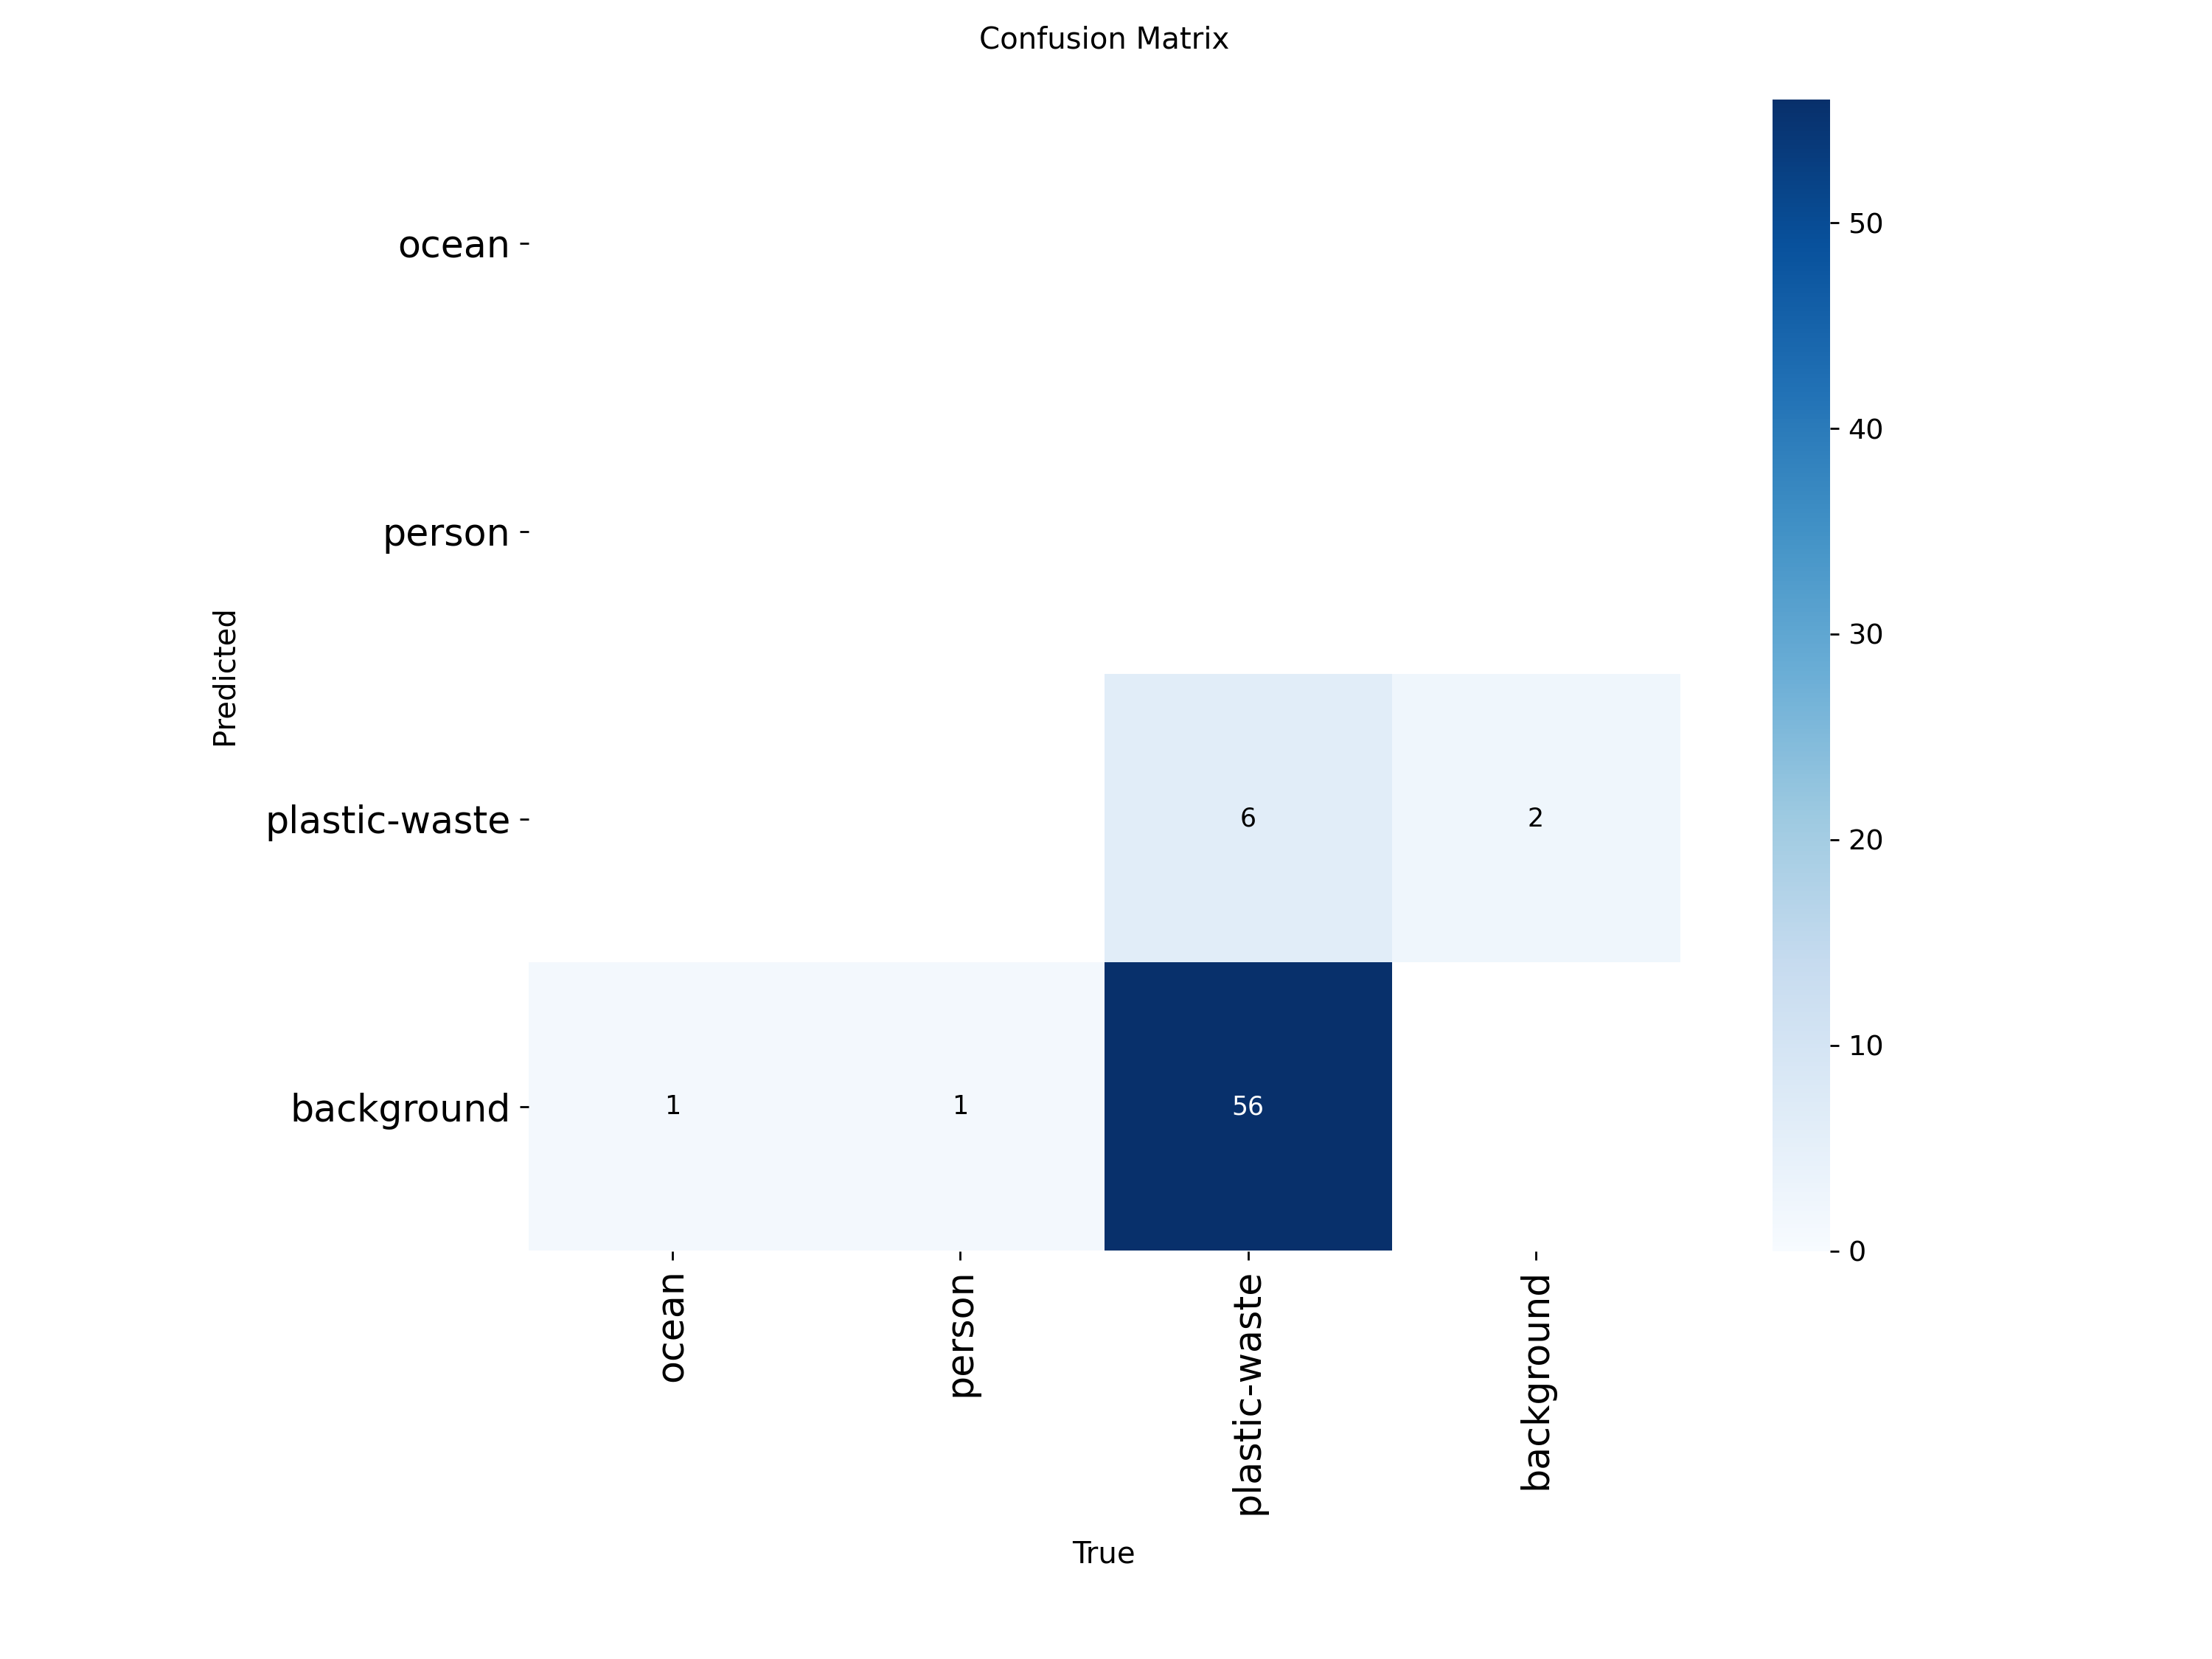

In [46]:
# Visualización de métricas del entrenamiento
from IPython.display import Image
Image(filename="runs/detect/plastic_waste_detection_v2/confusion_matrix.png", width=600)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

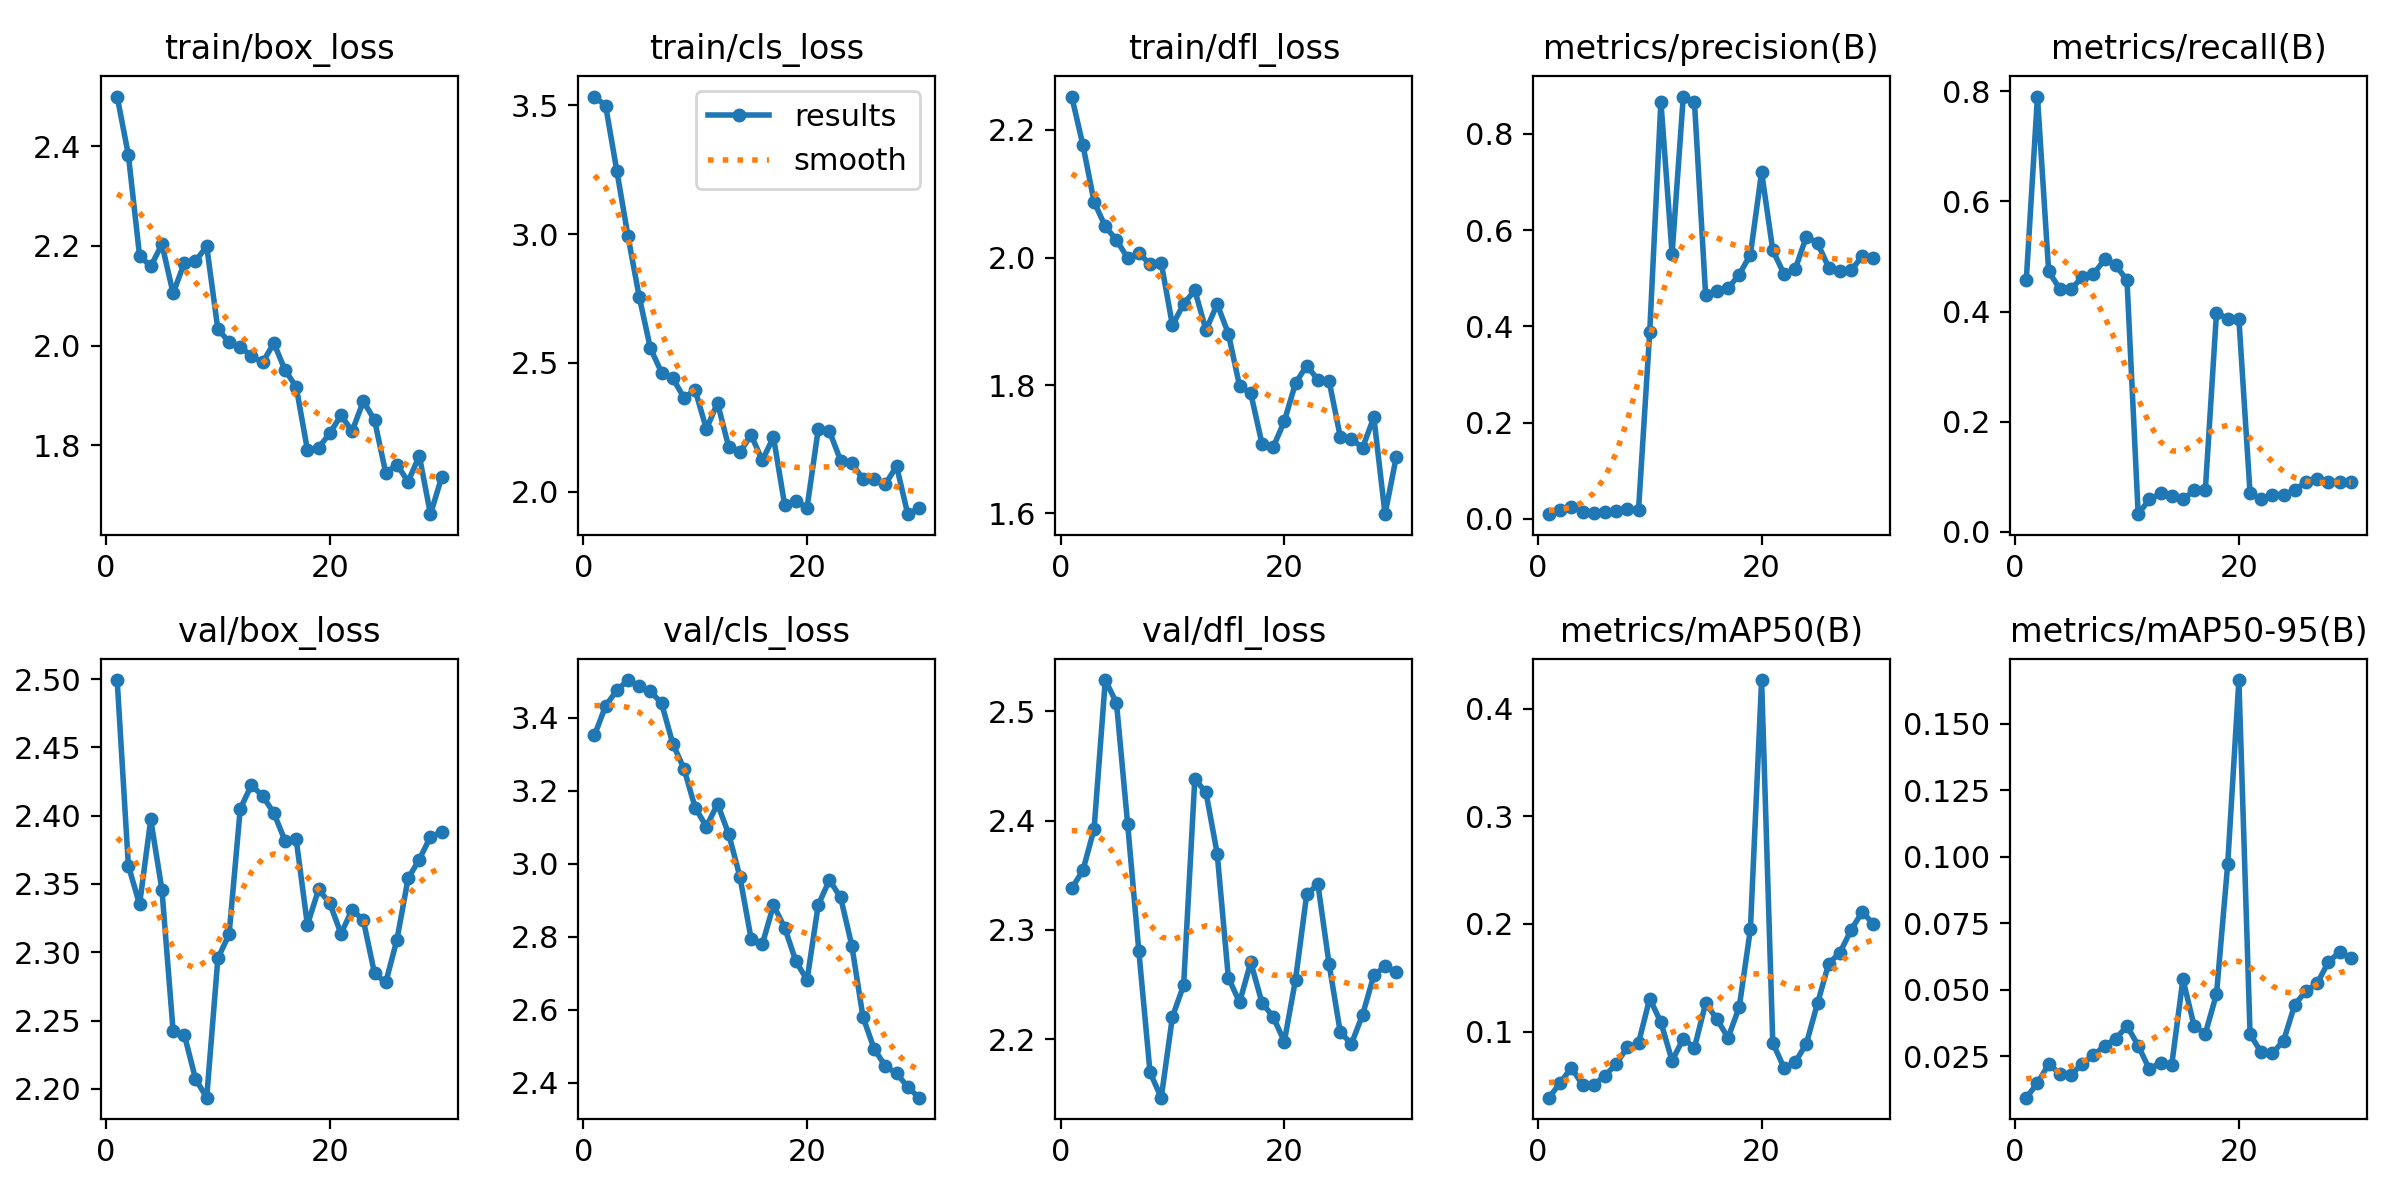

In [47]:
Image(filename="runs/detect/plastic_waste_detection_v2/results.png", width=600)


In [38]:
# Evaluación del modelo con datos de test
model.val(data=f"{dataset.location}/data.yaml")


Ultralytics 8.4.12 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 73 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1033.3±240.5 MB/s, size: 38.7 KB)
val: Scanning /content/Plastic-Waste-1/valid/labels.cache... 11 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 11/11 4.2Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 1.4it/s 0.7s
                   all         11         64      0.723      0.387      0.426      0.166
                 ocean          1          1      0.336          1      0.995      0.398
                person          1          1          1          0          0          0
         plastic-waste         11         62      0.833      0.161      0.284      0.101
Speed: 2.1ms preprocess, 6.8ms inference, 0.0ms loss, 8.6ms postprocess per image
Results saved to /content/runs/detect/val2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e57c9302a80>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [39]:
# Inferencia sobre imágenes de prueba
model.predict(
    source=f"{dataset.location}/test/images",
    save=True,
    conf=0.25
)



image 1/8 /content/Plastic-Waste-1/test/images/87514_jpg.rf.55ca17d98ada9da2874c659696738372.jpg: 640x640 (no detections), 7.3ms
image 2/8 /content/Plastic-Waste-1/test/images/bottle-on-beach-1-1_jpg.rf.fad8a0a8f5af83ff81632859089a93e6.jpg: 640x640 1 plastic-waste, 7.2ms
image 3/8 /content/Plastic-Waste-1/test/images/gettyimages-157393101-612x612_jpg.rf.ca0489f64f320fb51042fcd43effd936.jpg: 640x640 (no detections), 7.2ms
image 4/8 /content/Plastic-Waste-1/test/images/images--4-_jpg.rf.06b96682304cb50150867d7299edb981.jpg: 640x640 2 plastic-wastes, 7.2ms
image 5/8 /content/Plastic-Waste-1/test/images/miniature-shopping-cart-plastic-bottle-water-left-tourist-tropical-beach-sellable-commodity-environmental-131430099_jpg.rf.0cdd7663639a4fa5c252deb5a8216ecb.jpg: 640x640 (no detections), 7.2ms
image 6/8 /content/Plastic-Waste-1/test/images/plastic-bottle-floating-in-ocean-2400x1600_jpg.rf.81bb1fe34159202fd4d0bf1f2ea797c7.jpg: 640x640 (no detections), 7.3ms
image 7/8 /content/Plastic-Waste-1

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'ocean', 1: 'person', 2: 'plastic-waste'}
 obb: None
 orig_img: array([[[109, 117, 117],
         [105, 113, 113],
         [ 94, 100,  99],
         ...,
         [204, 190, 167],
         [202, 188, 165],
         [201, 187, 164]],
 
        [[127, 135, 135],
         [110, 118, 118],
         [ 97, 102, 103],
         ...,
         [205, 191, 168],
         [203, 189, 166],
         [202, 188, 165]],
 
        [[185, 192, 195],
         [137, 145, 145],
         [ 93,  98,  99],
         ...,
         [207, 193, 170],
         [205, 191, 168],
         [204, 190, 167]],
 
        ...,
 
        [[ 19,  18,  20],
         [ 20,  19,  21],
         [ 15,  14,  16],
         ...,
         [  7,   4,   6],
         [  6,   3,   5],
         [  9,   6,   8]],
 
        [[ 27,  26,  28],
         [ 38,  37,  39],
         [ 42,  41,  43],


In [40]:
# Seleccionar aleatoriamente una imagen del conjunto de validación
import random
from glob import glob

# Ruta a las imágenes de validación
val_images_path = f"{dataset.location}/valid/images"

# Listar imágenes
val_images = glob(val_images_path + "/*")

# Seleccionar una imagen al azar
random_image = random.choice(val_images)

random_image


'/content/Plastic-Waste-1/valid/images/_109986981_plastic-pollution-_jpg.rf.dc5f22d94b2817b2f13c0c7b269f8518.jpg'

In [41]:
# Ejecutar detección sobre la imagen seleccionada
results = model.predict(
    source=random_image,
    conf=0.1,
    save=True
)



image 1/1 /content/Plastic-Waste-1/valid/images/_109986981_plastic-pollution-_jpg.rf.dc5f22d94b2817b2f13c0c7b269f8518.jpg: 640x640 3 oceans, 2 plastic-wastes, 7.4ms
Speed: 3.6ms preprocess, 7.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict2


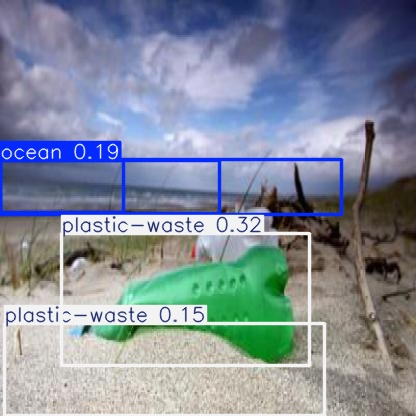

In [42]:
# Visualizar la imagen con las detecciones
from IPython.display import Image, display

display(Image(filename=results[0].save_dir + "/" + random_image.split("/")[-1], width=600))


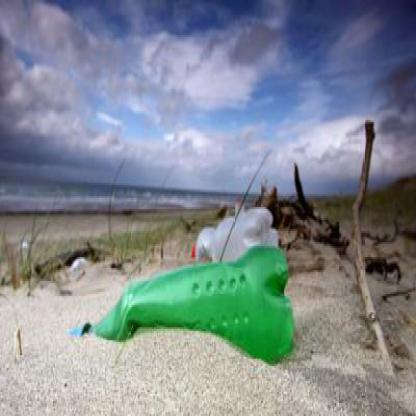

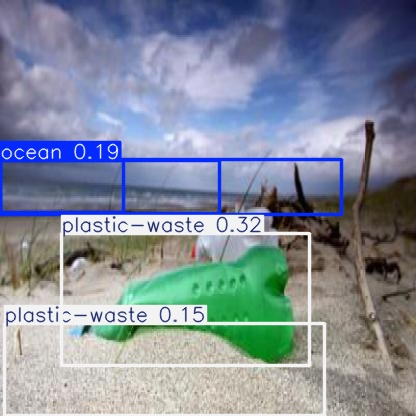

In [43]:
# Comparar imagen original vs detección
display(Image(filename=random_image, width=300))
display(Image(filename=results[0].save_dir + "/" + random_image.split("/")[-1], width=300))


(np.float64(-0.5), np.float64(415.5), np.float64(415.5), np.float64(-0.5))

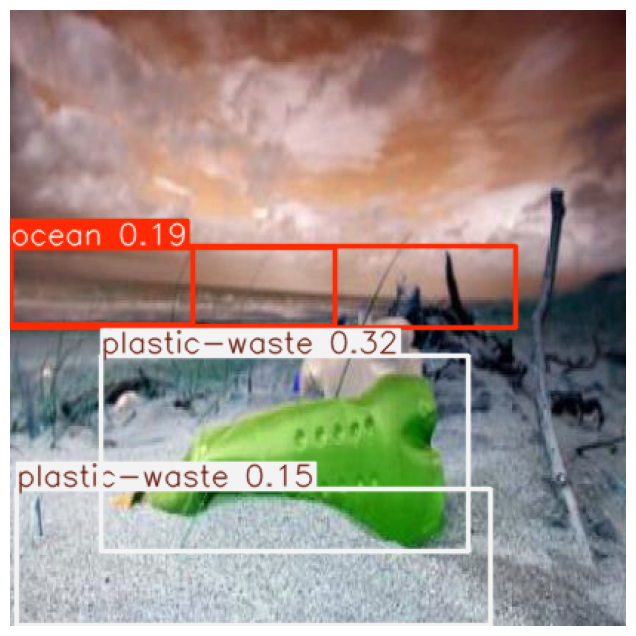

In [44]:
# Visualizar detecciones directamente desde el resultado
import matplotlib.pyplot as plt

# Obtener imagen con detecciones dibujadas
annotated_img = results[0].plot()

# Mostrar imagen
plt.figure(figsize=(8, 8))
plt.imshow(annotated_img)
plt.axis("off")


In [45]:
# Ver número de detecciones
len(results[0].boxes)


5